In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [47]:
cf_2018 = pd.read_csv('2018.csv')
cf_2018.head()

,Rk,Wk,Date,Time,Day,Winner,Pts,Unnamed: 7,Loser,Pts.1,TV,Notes
0,▲,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,25-Aug-18,7:30 PM,Sat,Hawaii,43.0,@,Colorado State,34.0,NaN,Sonny Lubrick Field at Canvas Stadium - Fort C...
2,2,1.0,25-Aug-18,5:30 PM,Sat,Massachusetts,63.0,NaN,Duquesne,15.0,NaN,"Warren McGuirk Alumni Stadium - Amherst, Massa..."
3,3,1.0,25-Aug-18,7:00 PM,Sat,Rice,31.0,NaN,Prairie View A&M,28.0,NaN,"Rice Stadium - Houston, Texas"
4,4,1.0,25-Aug-18,10:00 PM,Sat,Wyoming,29.0,@,New Mexico State,7.0,NaN,"Aggie Memorial Stadium - Las Cruces, New Mexico"


After exploring the data, we can reimport it and make the following changes to clean it up and provide additional, relevant information we will need for our EDA.

In [48]:
# Read in the file again.
cf_2018 = pd.read_csv('2018.csv')

# 'Unnamed: 7' indicated where the game was played at. Since the winner is listed first, the '@' indicates
# the game was played at the loser's home.  Therefore, we can create a new column called 'Winner_home' if 
# the '@' sign is not present.
cf_2018['Winner_home'] = cf_2018['Unnamed: 7']!='@'

# The rank is included in the winner and losers name within parenthesis.  The below regex will identify 
# numerical digits within the parenthesis and extract them to a new column as 'floats'.  We'll also 
# remove the rank in parenthesis from the original winner column.  We'll do this for winners and losers.
cf_2018['Winner_rank'] = cf_2018['Winner'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
cf_2018['Winner'] = cf_2018['Winner'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')
cf_2018['Loser_rank'] = cf_2018['Loser'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
cf_2018['Loser'] = cf_2018['Loser'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')

# Calculate a rank_diff socre.  The more negative this is, the more of an upset it is.
cf_2018['Rank_diff'] = cf_2018['Loser_rank'] - cf_2018['Winner_rank']

# 'Pts' and 'Pts.1' are unclear.  Lets make it a bit more obvious and also calculate the helpful difference
# between the two values as we can use margin of victory to see how close a game is.
cf_2018['Winner_pts'] = cf_2018['Pts']
cf_2018['Loser_pts'] = cf_2018['Pts.1']
cf_2018['Pts_diff'] = cf_2018['Winner_pts'] - cf_2018['Loser_pts']

# We no longer need several of these columns, so lets drop them.  We can keep the time fields in case
# we need them for later analysis.
cf_2018.drop(['Unnamed: 7', 'Pts', 'Pts.1', 'TV', 'Notes', 'Rk'], axis=1, inplace=True)

# Theres some weird formatting in the first line, and it didnt get dropped earlier.  Let's manually drop it
# and reindex the dataframe.
cf_2018.drop(0, axis=0, inplace=True)
cf_2018.reset_index(inplace=True, drop=True)

In [49]:
cf_2018.head()

,Wk,Date,Time,Day,Winner,Loser,Winner_home,Winner_rank,Loser_rank,Rank_diff,Winner_pts,Loser_pts,Pts_diff
0,1.0,25-Aug-18,7:30 PM,Sat,Hawaii,Colorado State,False,NaN,NaN,NaN,43.0,34.0,9.0
1,1.0,25-Aug-18,5:30 PM,Sat,Massachusetts,Duquesne,True,NaN,NaN,NaN,63.0,15.0,48.0
2,1.0,25-Aug-18,7:00 PM,Sat,Rice,Prairie View A&M,True,NaN,NaN,NaN,31.0,28.0,3.0
3,1.0,25-Aug-18,10:00 PM,Sat,Wyoming,New Mexico State,False,NaN,NaN,NaN,29.0,7.0,22.0
4,2.0,30-Aug-18,8:00 PM,Thu,Alabama-Birmingham,Savannah State,True,NaN,NaN,NaN,52.0,0.0,52.0


In [50]:
cf_2018.tail()

,Wk,Date,Time,Day,Winner,Loser,Winner_home,Winner_rank,Loser_rank,Rank_diff,Winner_pts,Loser_pts,Pts_diff
879,21.0,1-Jan-19,1:00 PM,Tue,Kentucky,Penn State,True,16.0,13.0,-3.0,27.0,24.0,3.0
880,21.0,1-Jan-19,1:00 PM,Tue,Louisiana State,Central Florida,True,11.0,7.0,-4.0,40.0,32.0,8.0
881,21.0,1-Jan-19,5:00 PM,Tue,Ohio State,Washington,True,5.0,9.0,4.0,28.0,23.0,5.0
882,21.0,1-Jan-19,8:45 PM,Tue,Texas,Georgia,True,14.0,6.0,-8.0,28.0,21.0,7.0
883,21.0,7-Jan-19,8:00 PM,Mon,Clemson,Alabama,True,2.0,1.0,-1.0,44.0,16.0,28.0


In [51]:
cf_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 13 columns):
Wk             884 non-null float64
Date           884 non-null object
Time           884 non-null object
Day            884 non-null object
Winner         884 non-null object
Loser          884 non-null object
Winner_home    884 non-null bool
Winner_rank    232 non-null float64
Loser_rank     107 non-null float64
Rank_diff      58 non-null float64
Winner_pts     884 non-null float64
Loser_pts      884 non-null float64
Pts_diff       884 non-null float64
dtypes: bool(1), float64(7), object(5)
memory usage: 83.9+ KB


In [52]:
cf_2018.describe()

,Wk,Winner_rank,Loser_rank,Rank_diff,Winner_pts,Loser_pts,Pts_diff
count,884.000000,232.000000,107.000000,58.000000,884.000000,884.000000,884.000000
mean,8.360860,11.702586,15.252336,3.310345,38.342760,19.139140,19.203620
std,4.557905,7.285305,6.799131,9.492762,13.150369,10.571864,14.648055
min,1.000000,1.000000,1.000000,-17.000000,7.000000,0.000000,1.000000
25%,4.000000,5.000000,9.000000,-3.000000,28.000000,13.000000,7.000000
50%,8.000000,11.000000,16.000000,3.000000,38.000000,17.000000,17.000000
75%,12.000000,18.000000,21.000000,9.750000,48.000000,26.000000,28.000000
max,21.000000,25.000000,25.000000,21.000000,79.000000,72.000000,77.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed3b390>,
      dtype=object)

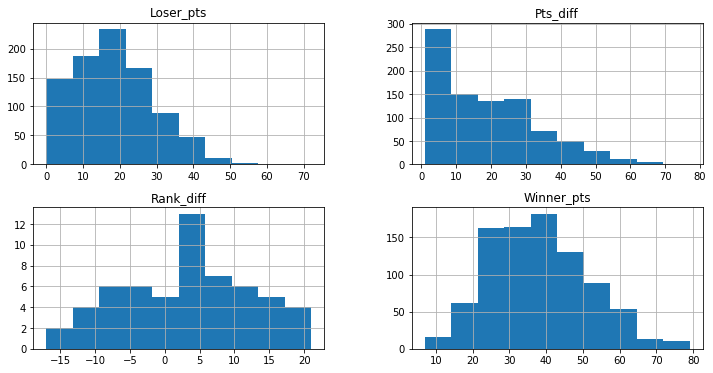

In [53]:
cf_2018[['Winner_pts', 'Loser_pts', 'Pts_diff', 'Rank_diff']].hist(figsize=(12,6))

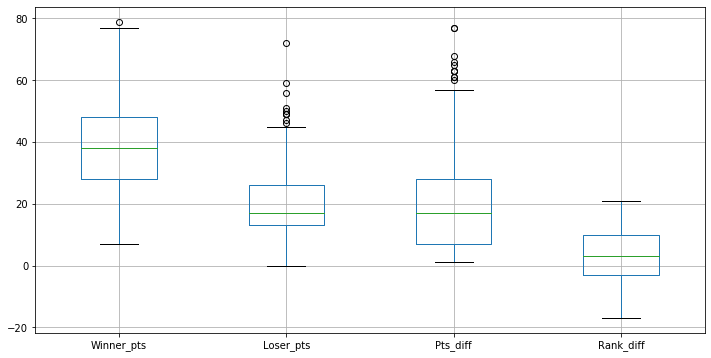

In [54]:
cf_2018[['Winner_pts', 'Loser_pts', 'Pts_diff', 'Rank_diff']].boxplot(figsize=(12,6))

## Lets look at when ranked teams play other ranked teams.

Lets look at when ranked team play each other.  From 'Rank_diff', there should be 58 such games in 2018.  Turns out the polls were right 37 out of 58 times, for a success rate of .638.  We could look at the likelihood that this is chance.

In [55]:
higher_beats_lower = cf_2018[cf_2018['Winner_rank'] < cf_2018['Loser_rank']]
print('Number of times a higher ranked team beats a lower ranked team:', len(higher_beats_lower))

lower_beats_higher = cf_2018[cf_2018['Winner_rank'] > cf_2018['Loser_rank']]
print('Number of times a lower ranked team beats a higher ranked team:', len(lower_beats_higher))

Number of times a higher ranked team beats a lower ranked team: 37
Number of times a lower ranked team beats a higher ranked team: 21


It also seems that the games are closer in score when the lower ranked team beats the favored team.  The average points difference when a higher team beat a lower team was 16.03, but it was only 12.90 when the lower ranked team won.  It also seemed that a higher percentage of games was won by less than 10 points (what we could call a "close" game) when the lower ranked team won.

Also, the absolute value of the rank_diff score is higher in the subset of data when higer teams defeat lower-ranked teams as expected.  There, the average rank_dff is 9.05.  When a lower-ranked team upsets a higher ranked team, the rank_diff is 6.81.  This suggests that polls are less accurate when the ranks between teams are less.  This makes sense because pollsters would be more likely to guess the winner when the #1 team played the #25 team than when the #12 team plays the #13 team.

In [56]:
higher_beats_lower.describe()

,Wk,Winner_rank,Loser_rank,Rank_diff,Winner_pts,Loser_pts,Pts_diff
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,10.513514,7.108108,16.162162,9.054054,34.135135,18.108108,16.027027
std,4.834032,4.777167,6.589189,6.022854,9.832379,13.213595,9.864320
min,2.000000,1.000000,3.000000,1.000000,10.000000,0.000000,1.000000
25%,6.000000,3.000000,12.000000,4.000000,27.000000,7.000000,7.000000
50%,11.000000,6.000000,17.000000,8.000000,36.000000,17.000000,16.000000
75%,13.000000,11.000000,22.000000,13.000000,41.000000,26.000000,24.000000
max,21.000000,19.000000,25.000000,21.000000,59.000000,56.000000,35.000000


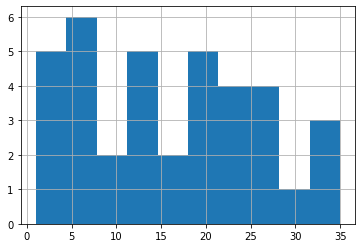

In [57]:
higher_beats_lower['Pts_diff'].hist()

In [58]:
lower_beats_higher.describe()

,Wk,Winner_rank,Loser_rank,Rank_diff,Winner_pts,Loser_pts,Pts_diff
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.333333,15.904762,9.095238,-6.809524,33.952381,21.047619,12.904762
std,7.030884,6.363213,5.233591,4.791858,10.273637,8.991530,8.659704
min,2.000000,2.000000,1.000000,-17.000000,19.000000,3.000000,1.000000
25%,6.000000,11.000000,6.000000,-10.000000,27.000000,16.000000,5.000000
50%,9.000000,16.000000,7.000000,-6.000000,33.000000,19.000000,13.000000
75%,19.000000,20.000000,13.000000,-3.000000,40.000000,24.000000,21.000000
max,21.000000,25.000000,19.000000,-1.000000,62.000000,45.000000,28.000000


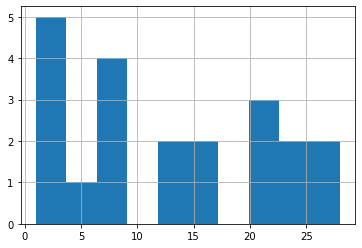

In [59]:
lower_beats_higher['Pts_diff'].hist()

## Lets look at ranked teams vs unranked teams

First, lets find out how many games there should be with at least one ranked team.  There are 884 games, so the total numers of games with at least one ranked and no one ranked should be 884.

In [60]:
at_least_one_ranked = cf_2018[(cf_2018['Winner_rank'] > 0) | (cf_2018['Loser_rank'] > 0)]
print('Numbers of games where at least one team is ranked:', len(at_least_one_ranked))

no_ranked = cf_2018[(cf_2018['Winner_rank'].isna()) & (cf_2018['Loser_rank'].isna())]
print('Numbers of games where no team is ranked:', len(no_ranked))

Numbers of games where at least one team is ranked: 281
Numbers of games where no team is ranked: 603


Looks good!  Now lets look closer at the games when only one team is ranked.  We'll break that out to two dataframes, when the ranked team wins and when the unranked team wins.

In [61]:
ranked_beats_unranked = cf_2018[(cf_2018['Winner_rank'] > 0) & (cf_2018['Loser_rank'].isna())]
print('Number of times a ranked team beats an unranked team:', len(ranked_beats_unranked))

unranked_beats_ranked = cf_2018[(cf_2018['Winner_rank'].isna()) & (cf_2018['Loser_rank'] > 0)]
print('Number of times an unranked team upsets a ranked team:', len(unranked_beats_ranked))

Number of times a ranked team beats an unranked team: 174
Number of times an unranked team upsets a ranked team: 49


These values add to 223, which with the 58 games examined above included adds up to 281, the total number of games with at least one ranked team.  So we are inclusive with all of our conditions.

## Team Exploration

In [66]:
winner_team = cf_2018['Winner'].unique().tolist()
loser_team = cf_2018['Loser'].unique().tolist()
teams = set(winner_team + loser_team)

In [69]:
len(teams)

219

In [71]:
cf_2018['Loser'].value_counts()


Central Michigan    11
Rutgers             11
Rice                11
San Jose State      11
Connecticut         11
                    ..
South Dakota         1
Lamar                1
Maine                1
Florida A&M          1
Murray State         1
Name: Loser, Length: 214, dtype: int64

In [ ]:
cf_2018['Loser'].value_counts()